# Bitcoin Analysis

DATA 198 DeCal

## Time Series

In [91]:
from datetime import datetime
import pandas as pd
import numpy as np
#imports modules for data analysis

In [121]:
btc_data = pd.read_csv("btc-historical-data.csv") #imported datasets: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data 
btc_data["Timestamp"] = pd.to_datetime(btc_data["Timestamp"], unit="s") #converted timestamp to datetime

In [93]:
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [94]:
#split timestamp into day, month, year, and time-in-date
btc_data["Day"] = btc_data["Timestamp"].dt.day.astype(str) 
btc_data["Month"] = btc_data["Timestamp"].dt.month.astype(str)
btc_data["Year"] = btc_data["Timestamp"].dt.year.astype(str)
btc_data["Time-in-date"] = btc_data["Year"] + "-" + btc_data["Month"] + "-" + btc_data["Day"]
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume,Day,Month,Year,Time-in-date
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0,1.0,1.0,2012.0,2012.0-1.0-1.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0,1.0,1.0,2012.0,2012.0-1.0-1.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0,1.0,1.0,2012.0,2012.0-1.0-1.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0,1.0,1.0,2012.0,2012.0-1.0-1.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0,1.0,1.0,2012.0,2012.0-1.0-1.0


In [95]:
btc_data = btc_data.drop_duplicates(subset=["Time-in-date"]) #drop duplicates
btc_data["close-in-log"] = np.log(btc_data["Close"]) #log transformation of data from exponential to "more stationary"
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume,Day,Month,Year,Time-in-date,close-in-log
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0,1.0,1.0,2012.0,2012.0-1.0-1.0,1.521699
839,2012-01-02 00:00:00,4.84,4.84,4.84,4.84,0.0,2.0,1.0,2012.0,2012.0-1.0-2.0,1.576915
2279,2012-01-03 00:00:00,5.00,5.00,5.00,5.00,0.0,3.0,1.0,2012.0,2012.0-1.0-3.0,1.609438
3719,2012-01-04 00:00:00,5.29,5.29,5.29,5.29,0.0,4.0,1.0,2012.0,2012.0-1.0-4.0,1.665818
5159,2012-01-05 00:00:00,5.57,5.57,5.57,5.57,0.0,5.0,1.0,2012.0,2012.0-1.0-5.0,1.717395


In [96]:
btc_data.isna().sum() #checks null values in dataset

Timestamp       1
Open            0
High            0
Low             0
Close           0
Volume          0
Day             0
Month           0
Year            0
Time-in-date    0
close-in-log    0
dtype: int64

<Axes: xlabel='Year'>

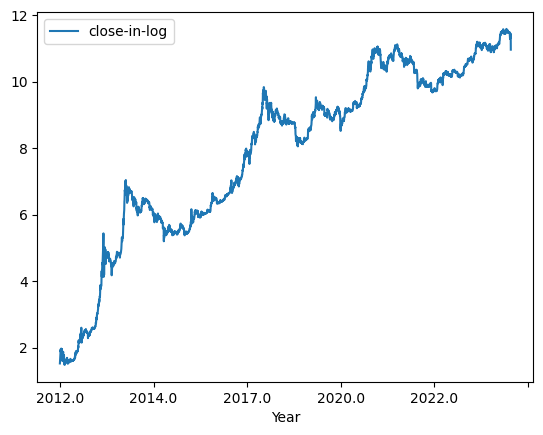

In [97]:
btc_data.plot(x="Year", y="close-in-log")
#plots data with Year on x-axis and Close-in-log on y-axis

<Axes: xlabel='Year'>

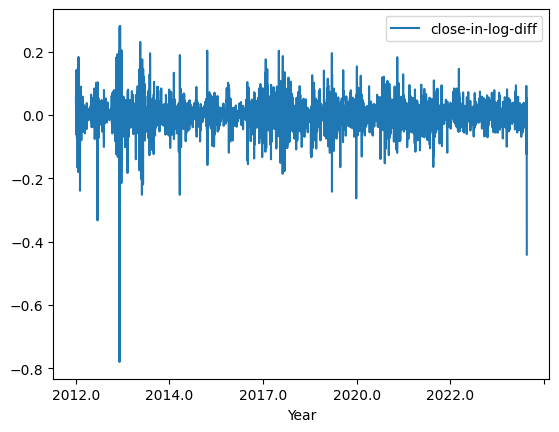

In [98]:
btc_data["close-in-log-diff"] = btc_data['close-in-log'].diff()
#log differencing of data
btc_data.plot(x="Year", y="close-in-log-diff")
#plots data with Year on x-axis and close-in-log-diff on y-axis

Augmented Dickey-Fuller test for Close prices:
0.33165087543351396

Augmented Dickey-Fuller test for log-differenced prices:
8.276350944717588e-22


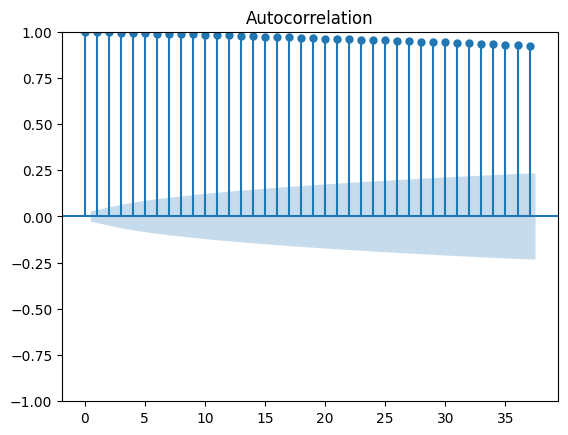

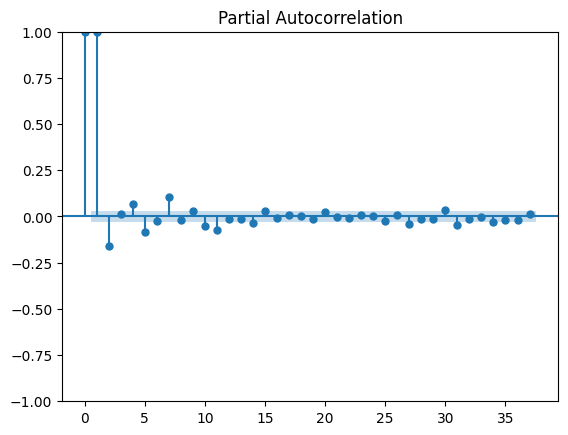

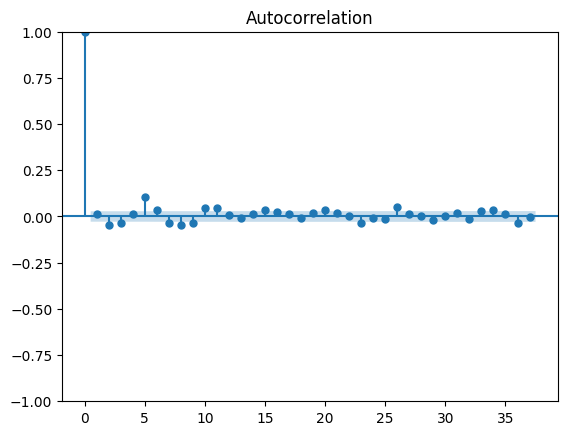

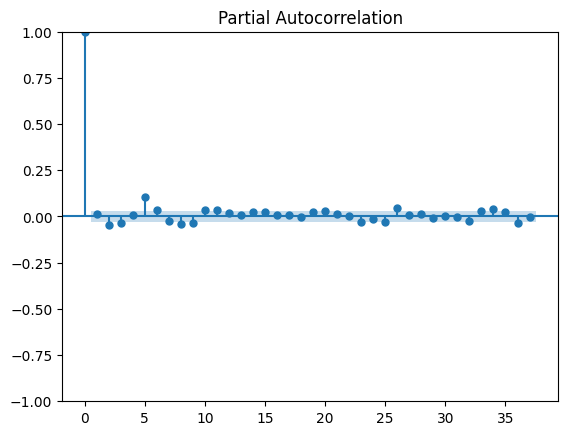

In [99]:
#CHECKPOINT 3 HYPOTHESIS TESTING
#note: ours is not a traditional hypothesis testing, but we use an adf test to test for stationarity
#as such, we dont have a specific test-statistic for this, but we can use adf test to get a p-value and we use that to reject or fail to reject the null

#imports modules for time series analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  # The correct function name is 'adfuller', not 'addfuller'

# Before - testing stationarity of the original Close prices
plot_acf(btc_data["Close"].dropna())
plot_pacf(btc_data["Close"].dropna())
#^drops null values
print("Augmented Dickey-Fuller test for Close prices:")
print(adfuller(btc_data["Close"].dropna())[1])
#^tests if data is stationary (not) [null is that the data is not stationary] [alternative is that the data is stationary]
#the p-value is around 0.3 which is >0.05 so the data is not stationary (we fail to reject the null hypothesis)
#thus we have to apply log-differencing

# After - testing stationarity of the log-differenced prices
plot_acf(btc_data["close-in-log-diff"].dropna())
plot_pacf(btc_data["close-in-log-diff"].dropna())
#^hypothesis testing: drops null values
print("\nAugmented Dickey-Fuller test for log-differenced prices:")
print(adfuller(btc_data["close-in-log-diff"].dropna())[1])
#^hypothesis testing: tests if data is stationary (yes) [null is that the data is not stationary] [alternative is that the data is stationary]
#the p-value is a lot smaller than 0.05 so the data is stationary (we successfully reject the null hypothesis)
#this means we can use this data for time series analysis (post log-differencing)


In [100]:
btc_data = btc_data[btc_data["Year"].astype(float) >= 2017.0]
from statsmodels.tsa.arima.model import ARIMA

testing_data = btc_data[btc_data["Year"].astype(float) >= 2024.0]
training_data = btc_data[btc_data["Year"].astype(float) < 2024.0]

train_data = list(training_data["close-in-log-diff"])
test_data = list(testing_data["close-in-log-diff"])

In [101]:
test_data

[0.006232601287289086,
 0.01156216987770442,
 0.0464178227546963,
 -0.06548741172259298,
 0.041551200379412734,
 -0.011968546283569026,
 0.009745264440340407,
 0.0021099686795178485,
 0.0622298045690961,
 -0.006152288054666499,
 -0.004187206169273594,
 0.0018058695652616308,
 -0.07021792725123888,
 -0.013360748015278645,
 0.0012601807926593267,
 0.0012818871131088372,
 0.002605319113069271,
 -0.011049319931119683,
 -0.027553626128570485,
 0.007888638518686264,
 -0.003984642814138795,
 0.0021143180793945504,
 -0.03335960790459502,
 -0.029667994762958116,
 0.016680150474437383,
 0.001030189671121562,
 0.05565604830947457,
 -0.006960363722059881,
 0.003343206858312797,
 0.025770073026459173,
 0.007937559754397583,
 0.0008524855075346949,
 -0.01328422553753228,
 0.001399319226420559,
 0.0033271706724899985,
 -0.0063848844395817395,
 -0.0026685409094220347,
 0.011813775508716873,
 0.011034562948353255,
 0.03767838412517577,
 0.04828048685769204,
 -0.004361252922857162,
 0.01919797977482851,

In [102]:
predictions = []
#I (Alex) wrote this btw, we will reimplement it after spring break with a hopefully simpler method. RMSE of around 2000 is actually quite good though!
diff_list = list(btc_data["Close"])
for i in range(len(test_data)):
    model = ARIMA(train_data, order=(2, 0, 1)) #p,d,q
    model_fit = model.fit()
    print(i)
    output = model_fit.forecast(steps=1)[0]
    output_transformed = np.exp(output + np.log(diff_list[-len(test_data) + i - 1]))
    predictions.append(output_transformed)

    train_data.append(test_data[i]) 


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

0
1
2
3


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4
5


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


275
276
277
278
279


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


348
349
350
351
352


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


353
354
355
356
357
358
359
360
361
362
363
364


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431


In [103]:
predictions

[np.float64(42436.018288613),
 np.float64(42709.49385180295),
 np.float64(43198.395836383286),
 np.float64(45202.15483059426),
 np.float64(42504.96276189827),
 np.float64(44109.07707675376),
 np.float64(43702.24817184941),
 np.float64(44078.363954749206),
 np.float64(44190.81711843354),
 np.float64(46929.526915760965),
 np.float64(46775.12334042052),
 np.float64(46549.609972516475),
 np.float64(46624.45927959652),
 np.float64(43571.54099806902),
 np.float64(42882.46449158135),
 np.float64(42935.6480073445),
 np.float64(42996.43487184404),
 np.float64(43106.782066008156),
 np.float64(42653.247737135694),
 np.float64(41511.911677857075),
 np.float64(41784.424707631),
 np.float64(41647.53352509458),
 np.float64(41722.98637975157),
 np.float64(40404.25814094301),
 np.float64(39205.45805671343),
 np.float64(39803.986039859235),
 np.float64(39881.90402512621),
 np.float64(42082.138303474945),
 np.float64(41898.72008119247),
 np.float64(42001.75268662158),
 np.float64(43069.29386374492),
 np.

In [104]:
btc_data["close-in-log-diff"]

2629979    0.006876
2631419    0.033467
2632859    0.015305
2634299    0.009546
2635739    0.104395
             ...   
6776279    0.092253
6776280   -0.122975
6777279    0.043084
6777280    0.051413
6778279   -0.020899
Name: close-in-log-diff, Length: 2988, dtype: float64

In [105]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(btc_data[btc_data["Year"].astype(float) >= 2024.0]["Close"], predictions))


np.float64(1983.7400397738031)

In [106]:
predictions = []
#I (Alex) wrote this btw, we will reimplement it after spring break with a hopefully simpler method. RMSE of around 2000 is actually quite good though!
diff_list = list(btc_data["Close"])
model2 = ARIMA(train_data, order=(2, 0, 1)) #p,d,q
model2_fit = model2.fit()
for i in range(len(test_data)):
    print(i)
    output = model2_fit.forecast(steps=1)[0]
    output_transformed = np.exp(output + np.log(diff_list[-len(test_data) + i - 1])) #Use predicted value instead of actual value
    predictions.append(output_transformed)
    model2_fit = model2_fit.append([output], refit=False)

0
1
2
3
4
5
6
7


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
28

In [107]:
predictions

[np.float64(42532.181524249965),
 np.float64(42716.9304165312),
 np.float64(43216.41422746849),
 np.float64(45267.632346785955),
 np.float64(42397.32328641044),
 np.float64(44195.59532028583),
 np.float64(43669.51889706276),
 np.float64(44097.01781465444),
 np.float64(44190.07465622647),
 np.float64(47027.3313303518),
 np.float64(46738.866288260724),
 np.float64(46543.55497366204),
 np.float64(46627.674058120036),
 np.float64(43465.87733234082),
 np.float64(42889.000628590846),
 np.float64(42943.081267726506),
 np.float64(42998.164012527785),
 np.float64(43110.33359808866),
 np.float64(42636.61545565611),
 np.float64(41477.85924901806),
 np.float64(41806.35701639471),
 np.float64(41640.1050263163),
 np.float64(41728.238570840316),
 np.float64(40359.16374570342),
 np.float64(39179.37578765499),
 np.float64(39838.374487460496),
 np.float64(39879.43671481149),
 np.float64(42161.89574766987),
 np.float64(41869.4525536052),
 np.float64(42009.66504328293),
 np.float64(43106.3270185459),
 np.

In [108]:
np.sqrt(mean_squared_error(btc_data[btc_data["Year"].astype(float) >= 2024.0]["Close"], predictions))

np.float64(1989.148484354233)

/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/638380624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data['predictions'] = [None] * (len(btc_data) - len(test_data)) + predictions
/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/638380624.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data['Time-in-date'] = btc_data.apply(lambda x: format_date(x['Year'], x['Month'], x['Day']), axis=1)
/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/6383806

<Figure size 1200x800 with 0 Axes>

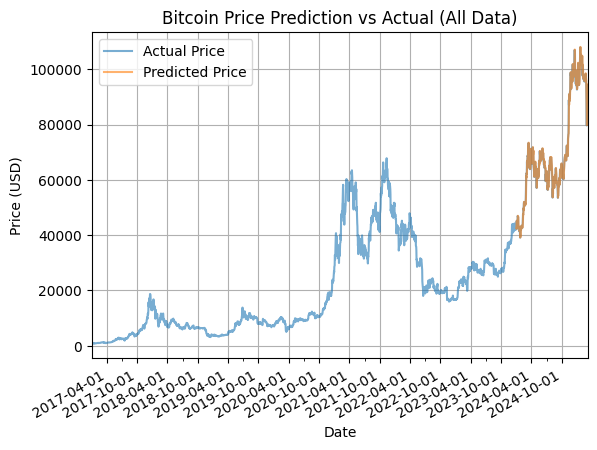

/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/638380624.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data_2024['Time-in-date'] = btc_data_2024.apply(lambda x: format_date(x['Year'], x['Month'], x['Day']), axis=1)
/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/638380624.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data_2024['Time-in-date'] = pd.to_datetime(btc_data_2024['Time-in-date'])


<Figure size 1200x800 with 0 Axes>

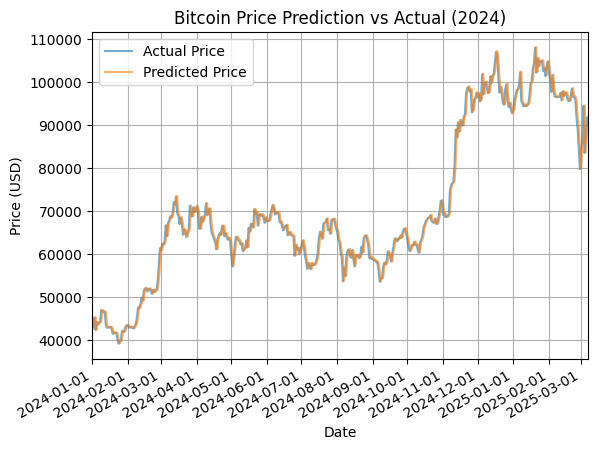

In [109]:
import pandas as pd

btc_data['predictions'] = [None] * (len(btc_data) - len(test_data)) + predictions
btc_data.tail()

btc_data_2024 = btc_data[btc_data["Year"].astype(float) >= 2024.0]

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Format the date string correctly before converting to datetime
def format_date(year, month, day):
    return f"{int(float(year))}-{int(float(month)):02d}-{int(float(day)):02d}"

btc_data['Time-in-date'] = btc_data.apply(lambda x: format_date(x['Year'], x['Month'], x['Day']), axis=1)
btc_data['Time-in-date'] = pd.to_datetime(btc_data['Time-in-date'])

# Plot for all data
plt.figure(figsize=(12,8))
btc_data.set_index('Time-in-date', inplace=True)
btc_data[['Close','predictions']].plot(alpha=0.6)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 6 months
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.title('Bitcoin Price Prediction vs Actual (All Data)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['Actual Price', 'Predicted Price'])
plt.grid(True)
plt.show()

# Plot for 2024 data
plt.figure(figsize=(12,8))
# Format dates for 2024 data
btc_data_2024['Time-in-date'] = btc_data_2024.apply(lambda x: format_date(x['Year'], x['Month'], x['Day']), axis=1)
btc_data_2024['Time-in-date'] = pd.to_datetime(btc_data_2024['Time-in-date'])
btc_data_2024.set_index('Time-in-date', inplace=True)
btc_data_2024[['Close','predictions']].plot(alpha=0.6)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show ticks for each month
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.title('Bitcoin Price Prediction vs Actual (2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['Actual Price', 'Predicted Price'])
plt.grid(True)
plt.show()

In [110]:
btc_data.tail()

,Timestamp,Open,High,Low,Close,Volume,Day,Month,Year,close-in-log,close-in-log-diff,predictions
Time-in-date,,,,,,,,,,,,
2025-03-03,2025-03-03 00:00:00,94272.0,94422.0,94272.0,94422.0,0.457150,3.0,3.0,2025.0,11.455529,0.092253,86231.682875
2025-03-04,2025-03-04 07:21:00,83459.0,83508.0,83452.0,83496.0,0.214201,4.0,3.0,2025.0,11.332554,-0.122975,94565.312370
2025-03-05,2025-03-05 00:00:00,87262.0,87262.0,87172.0,87172.0,2.575814,5.0,3.0,2025.0,11.375638,0.043084,83622.729043
2025-03-06,2025-03-06 07:21:00,91783.0,91783.0,91768.0,91771.0,0.106510,6.0,3.0,2025.0,11.427052,0.051413,87304.308423
2025-03-07,2025-03-07 00:00:00,89922.0,90008.0,89872.0,89873.0,0.669635,7.0,3.0,2025.0,11.406153,-0.020899,91910.288720


In [111]:
predictions = []
#I (Alex) wrote this btw, we will reimplement it after spring break with a hopefully simpler method. RMSE of around 2000 is actually quite good though!
diff_list = list(btc_data["Close"])
model2 = ARIMA(train_data, order=(2, 0, 1)) #p,d,q
model2_fit = model2.fit()
for i in range(len(test_data)):
    print(i)
    output = model2_fit.forecast(steps=1)[0]
    output_transformed = np.exp(output + np.log(diff_list[-len(test_data) + i - 1]))
    predictions.append(output_transformed)
    model2_fit = model2_fit.append([test_data[i]], refit=False)

/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [112]:
btc_data

,Timestamp,Open,High,Low,Close,Volume,Day,Month,Year,close-in-log,close-in-log-diff,predictions
Time-in-date,,,,,,,,,,,,
2017-01-01,2017-01-01 00:00:00,963.16,963.16,963.16,963.16,0.000000,1.0,1.0,2017.0,6.870220,0.006876,NaN
2017-01-02,2017-01-02 00:00:00,996.53,996.54,995.94,995.94,28.054473,2.0,1.0,2017.0,6.903687,0.033467,NaN
2017-01-03,2017-01-03 00:00:00,1012.94,1014.52,1010.35,1011.30,1.822642,3.0,1.0,2017.0,6.918992,0.015305,NaN
2017-01-04,2017-01-04 00:00:00,1020.34,1021.00,1020.34,1021.00,56.049902,4.0,1.0,2017.0,6.928538,0.009546,NaN
2017-01-05,2017-01-05 00:00:00,1133.35,1133.35,1133.35,1133.35,0.009840,5.0,1.0,2017.0,7.032933,0.104395,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03,2025-03-03 00:00:00,94272.00,94422.00,94272.00,94422.00,0.457150,3.0,3.0,2025.0,11.455529,0.092253,86231.682875
2025-03-04,2025-03-04 07:21:00,83459.00,83508.00,83452.00,83496.00,0.214201,4.0,3.0,2025.0,11.332554,-0.122975,94565.312370
2025-03-05,2025-03-05 00:00:00,87262.00,87262.00,87172.00,87172.00,2.575814,5.0,3.0,2025.0,11.375638,0.043084,83622.729043


In [113]:
# // Three day forecast - credit to the Alex Zhai
# // Source: https://colab.research.google.com/drive/1JIF-kEOB0QYiC85SU2Rx9izcSOCJfvTj?usp=sharing 

diff2 = btc_data[["close-in-log"]].diff(periods=2).dropna()
diff3 = btc_data[["close-in-log"]].diff(periods=3).dropna()

btc_data["Log and Diff 2"] = diff2
btc_data["Log and Diff 3"] = diff3

/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/4021013136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data["Log and Diff 2"] = diff2
/var/folders/0v/r_qgd1yn2b3_00420l629dcr0000gn/T/ipykernel_8343/4021013136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data["Log and Diff 3"] = diff3


In [114]:
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume,Day,Month,Year,close-in-log,close-in-log-diff,predictions,Log and Diff 2,Log and Diff 3
Time-in-date,,,,,,,,,,,,,,
2017-01-01,2017-01-01,963.16,963.16,963.16,963.16,0.000000,1.0,1.0,2017.0,6.870220,0.006876,NaN,NaN,NaN
2017-01-02,2017-01-02,996.53,996.54,995.94,995.94,28.054473,2.0,1.0,2017.0,6.903687,0.033467,NaN,NaN,NaN
2017-01-03,2017-01-03,1012.94,1014.52,1010.35,1011.30,1.822642,3.0,1.0,2017.0,6.918992,0.015305,NaN,0.048772,NaN
2017-01-04,2017-01-04,1020.34,1021.00,1020.34,1021.00,56.049902,4.0,1.0,2017.0,6.928538,0.009546,NaN,0.024851,0.058318
2017-01-05,2017-01-05,1133.35,1133.35,1133.35,1133.35,0.009840,5.0,1.0,2017.0,7.032933,0.104395,NaN,0.113941,0.129246


/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/minggangli/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<Axes: xlabel='Time-in-date'>

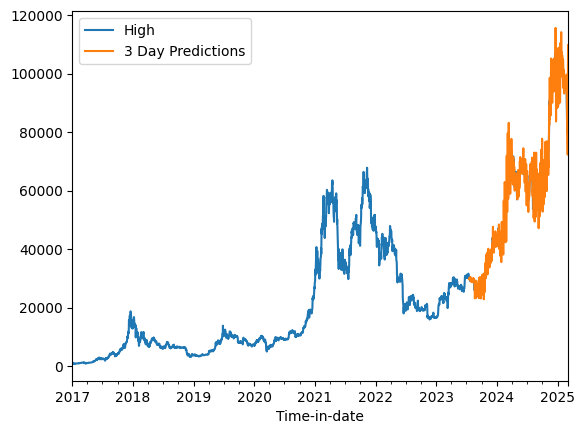

In [120]:
train_amount = int(len(btc_data)*0.8)
test_amount = len(btc_data) - train_amount

train1 = btc_data.iloc[0: train_amount]["close-in-log-diff"] #.iloc, the rows and then the columns
test1 = btc_data.iloc[train_amount:train_amount + test_amount]["close-in-log-diff"]

train2 = btc_data.iloc[0: train_amount]["Log and Diff 2"].dropna() #.iloc, the rows and then the columns
test2 = btc_data.iloc[train_amount:train_amount + test_amount]["Log and Diff 2"]

train3 = btc_data.iloc[0: train_amount]["Log and Diff 3"].dropna() #.iloc, the rows and then the columns
test3 = btc_data.iloc[train_amount:train_amount + test_amount]["Log and Diff 3"]

num_obs = len(test3)
len(test3)

model1 = ARIMA(train1, order=(2,0,1)).fit()
model2 = ARIMA(train2, order=(2, 0, 1)).fit()
model3 = ARIMA(train3, order = (2,0,1)).fit()

diff_list = list(btc_data["High"])

predictions2 = []

for i in range(num_obs):

    if i % 3 == 0:  # Model 1 handles t+1, t+4, t+7, ...
        forecast1 = model1.forecast(steps=1).iloc[0]
        prev1 = np.log(diff_list[-len(test1) + i - 1]) #Reversing the differencing
        reversed_pred1 = np.exp(forecast1 + prev1)
        predictions2.append(reversed_pred1)
        model1 = model1.append([list(test1)[i]], refit=False)

    elif i % 3 == 1:  # Model 2 handles t+2, t+5, ...
        forecast2 = model2.forecast(steps=1).iloc[0]
        prev2 = np.log(diff_list[-len(test2) + i - 2])
        reversed_pred2 = np.exp(forecast2 + prev2)
        predictions2.append(reversed_pred2)
        model2 = model2.append([list(test2)[i]], refit=False)

    else:  # i % 3 == 2 → Model 3 handles t+3, t+6, ...
        forecast3 = model3.forecast(steps=1).iloc[0]
        prev3 = np.log(diff_list[-len(test3) + i - 3])
        reversed_pred3 = np.exp(forecast3 + prev3)
        predictions2.append(reversed_pred3)
        model3 = model3.append([list(test3)[i]], refit=False)

    print(i)


predictions2

from sklearn.metrics import mean_squared_error

btc_data["3 Day Predictions"] = [None] * (len(train1)) + predictions2

np.sqrt(mean_squared_error(predictions2, btc_data.iloc[train_amount:train_amount + test_amount]["High"]))

btc_data[["High", "3 Day Predictions"]].plot()

In [116]:

np.sqrt(mean_squared_error(predictions2, btc_data.iloc[train_amount:train_amount + test_amount]["High"]))

np.float64(4134.557090488273)

Text(0.5, 1.0, 'Bitcoin Price 3 Day Prediction')

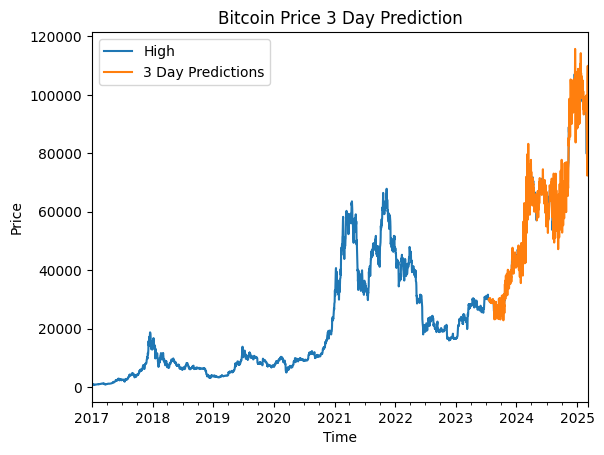

In [117]:
from sklearn.metrics import mean_squared_error

btc_data["3 Day Predictions"] = [None] * (len(train1)) + predictions2

np.sqrt(mean_squared_error(predictions2, btc_data.iloc[train_amount:train_amount + test_amount]["High"]))

btc_data[["High", "3 Day Predictions"]].plot()
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("Bitcoin Price 3 Day Prediction")

In [118]:
btc_data.head()

,Timestamp,Open,High,Low,Close,Volume,Day,Month,Year,close-in-log,close-in-log-diff,predictions,Log and Diff 2,Log and Diff 3,3 Day Predictions
Time-in-date,,,,,,,,,,,,,,,
2017-01-01,2017-01-01,963.16,963.16,963.16,963.16,0.000000,1.0,1.0,2017.0,6.870220,0.006876,NaN,NaN,NaN,NaN
2017-01-02,2017-01-02,996.53,996.54,995.94,995.94,28.054473,2.0,1.0,2017.0,6.903687,0.033467,NaN,NaN,NaN,NaN
2017-01-03,2017-01-03,1012.94,1014.52,1010.35,1011.30,1.822642,3.0,1.0,2017.0,6.918992,0.015305,NaN,0.048772,NaN,NaN
2017-01-04,2017-01-04,1020.34,1021.00,1020.34,1021.00,56.049902,4.0,1.0,2017.0,6.928538,0.009546,NaN,0.024851,0.058318,NaN
2017-01-05,2017-01-05,1133.35,1133.35,1133.35,1133.35,0.009840,5.0,1.0,2017.0,7.032933,0.104395,NaN,0.113941,0.129246,NaN


<Axes: xlabel='Time-in-date'>

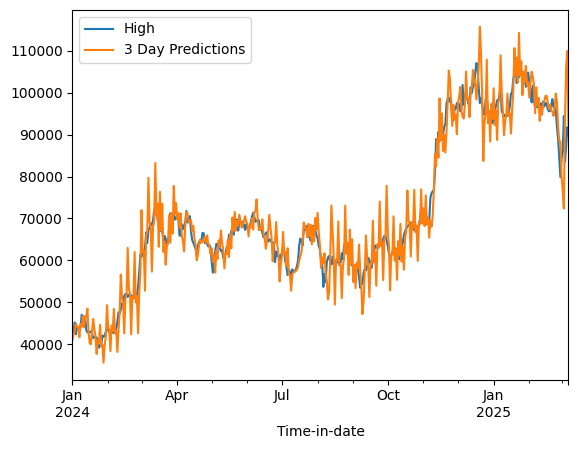

In [119]:
btc_data[btc_data["Timestamp"].dt.year >= 2024][["High", "3 Day Predictions"]].plot()

In [89]:
np.sqrt(mean_squared_error(predictions2, btc_data.iloc[train_amount:train_amount + test_amount]["High"]))

np.float64(1899.3825577714038)